<a href="https://colab.research.google.com/github/amchang2/LLM-Surprisal-Project/blob/main/Final_Project_Cogs_150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Cogs 150

**Amanda Chang**

*Spring 2024*



---



Research question: Are LLMs sensitive to negation?

To explore an LLM's sensitivity to negation thoroughly, these questions were addressed when creating the stimuli:

- Do LLMs display consistently higher **surprisal** when presented with `semantically similar` words or with `logical opposites` in negation tasks?
-  Do LLMs display different  **surprisal** values to a target word depending on whether it follows an `affirmative` or `negated` sentence?

## Transformers Set Up

## Install and load `transformers`

In [ ]:
%pip install transformers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Load a pre-trained model

We can use the `from_pretrained` function to load an existing, pre-trained model (GPT-2).

In [ ]:
import torch
import transformers

In [ ]:
gpt2 = transformers.AutoModelForCausalLM.from_pretrained("gpt2")  # Load the model
gpt2.eval()  # Put the model in "evaluation mode" (as opposed to training mode).

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

## Psycholinguistic stimuli

Research question: Are LLMs sensitive to negation?

To test this, we'd need to devise *pairs* of stimuli:

- We'll run each of these through GPT-2.  

**Semantically similar words vs. Logical opposites:**
- For each "minimal pair" (`The weather today is not cloudy, it is`), we'll want two versions, which end with either a `semantically similar` word (` foggy`) or a `logical opposite` (` sunny`).
- Final words are reused with a different sentence frame that inverts the logistically opposite pattern.
- If the LLM is sensitive to negation, the surprisal relationships should reflect that `semantically similar` and `same word` completions consistently have higher surprisal than `logical opposite` completions.


**Affirmative vs. Negated sentences:**
- For each "minimal pair", we'll want two versions, which begin with an `affirmative` sentence frame (`'A mouse is a'`) or a `negated` sentence frame (`'A mouse is not a'`).
- Sentence structures are reused with a word that inverts the logistically opposite pattern.
- There are different types completions for each `affirmative` and `negated` sentence frame, which include: `Affirmative-Correct`, `Negated-Anomalous`, `Affirmative-Related`, `Negated-Related`, `Affirmative-Nonrelated`, `Negated-Nonrelated`, `Affirmative-Same`, and `Negated-Same`. `Affirmative-Correct` words are words that correctly categorize the subject. `Negated-Anomalous` words are the same words used in the `Affirmative-Correct`, which should create higher surprisal since the word is not a logical opposite of the subject. `Related` words are words within the same category of the subject, `Nonrelated` words are words that would have no relation to the subject whatsoever.
- If the LLM is sensitive to negation, the surprisal relationships between `affirmative` and `negated` sentence frames should reflect the following within the specified minimal pairs:


1.   Negated surprisal should be higher than affirmative surprisal: `Affirmative-Correct` and `Negated-Anomalous`, `Affirmative-Same`, and `Negated-Same`
2.   Affirmative surprisal should be higher than negated surprisal:
`Affirmative-Related` and `Negated-Related`, `Affirmative-Nonrelated` and `Negated-Nonrelated`(although, these two might have similar high surprisal since the subject and unrelated critical word do not commonly appear together)


**Possible counfounds or issues:**
- Minimal pairs are good for assessing grammatical rules, but they may fall short when assessing meaning during negation since the stimuli will focus on the negation term `not` rather than a general ability to handle negation.
- `not` is the only negation term used throughout the stimuli, while it is consistent, it does not necessarily cover all scopes of negation (e.g., "never", "neither", "no", offline methods using "true" or "false").
- Some completions could generate higher surprisal due to being rare rather than being false, which would be a reflection of the training data and not the LLM.
- The use of either "a" or "an" at the end of affirmative and negated sentence frames could introduce surprisal differences that are unrelated to semantic content since GPT-2 might be sensitive to phonological cues.
- World Knowledge Violations: even when negation is syntactically correct, the model may assign high probability to a semantically similar word due to frequent associations between the two words.
- Human bias: the completions for each conditions are subjective to the researcher, critical word selections may be inconsistent with how they meet their condition.


### Defining the stimuli

- Each stimulis has a sentence, final completion, and condition label.
- The sentences come in *pairs*. This is to make sure we control for everything but the final word.  
- The `same word` condition is also used as a control, if the LLM is sensitive to negation, `same word` completions should have similar surprisal to `semantically similar` and `negated-anomalous` completions. This condition will directly measure whether the model suppresses the probability of a semantically affirmed word when it is logically contradicted by negation in the sentence frame. This is important for isolating the use of "not" within a sentence frame and determining if differences in surprisal are from an LLM's sensitivity to negation or it's ability to "pattern match" and favor repetition.

In [ ]:
stimuli1 = [
    ### sentence, word, condition, item number
    ('He is not stupid, he is', ' dumb', 'Semantically Similar'),
    ('He is not stupid, he is', ' smart', 'Logical Opposite'),
    ('He is not intellegent, he is', ' smart', 'Semantically Similar'),
    ('He is not intellegent, he is', ' dumb', 'Logical Opposite'),
    ('She is not nice, she is', ' sweet', 'Semantically Similar'),
    ('She is not nice, she is', ' mean', 'Logical Opposite'),
    ('She is not callous, she is', ' mean', 'Semantically Similar'),
    ('She is not callous, he is', ' sweet', 'Logical Opposite'),
    ('The weather today is not cloudy, it is', ' foggy', 'Semantically Similar'),
    ('The weather today is not cloudy, it is', ' sunny', 'Logical Opposite'),
    ('The weather today is not clear, it is', ' sunny', 'Semantically Similar'),
    ('The weather today is not clear, it is', ' foggy', 'Logical Opposite'),
    ('He is not hardworking, he is', ' determined', 'Semantically Similar'),
    ('He is not hardworking, he is', ' lazy', 'Logical Opposite'),
    ('He is not idle, he is', ' lazy', 'Semantically Similar'),
    ('He is not idle, he is', ' determined', 'Logical Opposite'),
    ('She is not shy, she is', ' introverted', 'Semantically Similar'),
    ('She is not shy, she is', ' extroverted', 'Logical Opposite'),
    ('She is not outgoing, she is', ' extroverted', 'Semantically Similar'),
    ('She is not outgoing, she is', ' introverted', 'Logical Opposite'),
    ('He is not stupid, he is', ' stupid', 'Same Word'),
    ('He is not intellegent, he is', ' intellegent', 'Same Word'),
    ('She is not nice, she is', ' nice', 'Same Word'),
    ('She is not callous, she is', ' callous', 'Same Word'),
    ('The weather today is not cloudy, it is', ' cloudy', 'Same Word'),
    ('The weather today is not clear, it is', ' clear', 'Same Word'),
    ('He is not hardworking, he is', ' hardworking', 'Same Word'),
    ('He is not idle, he is', ' idle', 'Same Word'),
    ('She is not shy, she is', ' shy', 'Same Word'),
    ('She is not outgoing, she is', ' outgoing', 'Same Word')
]

In [ ]:
stimuli2 = [
    ### sentence, word, condition, item number
    ('A mouse is a', ' rodent', 'Affirmative-Correct'),
    ('A mouse is not a', ' rodent', 'Negated-Anomalous'),
    ('A mouse is a', ' rat', 'Affirmative-Related'),
    ('A mouse is not a', ' rat', 'Negated-Related'),
    ('A mouse is a', ' cup', 'Affirmative-Nonrelated'),
    ('A mouse is not a', ' cup', 'Negated-Nonrelated'),
    ('A rose is a', ' flower', 'Affirmative-Correct'),
    ('A rose is not a', ' flower', 'Negated-Anomalous'),
    ('A rose is a', ' tulip', 'Affirmative-Related'),
    ('A rose is not a', ' tulip', 'Negated-Related'),
    ('A rose is a', ' spoon', 'Affirmative-Nonrelated'),
    ('A rose is not a', ' spoon', 'Negated-Nonrelated'),
    ('A dolphin is a', ' mammal', 'Affirmative-Correct'),
    ('A dolphin is not a', ' mammal', 'Negated-Anomalous'),
    ('A dolphin is a', ' whale', 'Affirmative-Related'),
    ('A dolphin is not a', ' whale', 'Negated-Related'),
    ('A dolphin is a', ' chair', 'Affirmative-Nonrelated'),
    ('A dolphin is not a', ' chair', 'Negated-Nonrelated'),
    ('A violin is an', ' instrument', 'Affirmative-Correct'),
    ('A violin is not an', ' instrument', 'Negated-Anomalous'),
    ('A violin is a', ' viola', 'Affirmative-Related'),
    ('A violin is not a', ' viola', 'Negated-Related'),
    ('A violin is a', ' human', 'Affirmative-Nonrelated'),
    ('A violin is not a', ' human', 'Negated-Nonrelated'),
    ('A grape is a', ' fruit', 'Affirmative-Correct'),
    ('A grape is not a', ' fruit', 'Negated-Anomalous'),
    ('A grape is a', ' blueberry', 'Affirmative-Related'),
    ('A grape is not a', ' blueberry', 'Negated-Related'),
    ('A grape is a', ' pillow', 'Affirmative-Nonrelated'),
    ('A grape is not a', ' pillow', 'Negated-Nonrelated'),
    ('A mouse is a', ' mouse', 'Affirmative-Same'),
    ('A mouse is not a', ' mouse', 'Negated-Same'),
    ('A rose is a', ' rose', 'Affirmative-Same'),
    ('A rose is not a', ' rose', 'Negated-Same'),
    ('A dolphin is a', ' dolphin', 'Affirmative-Same'),
    ('A dolphin is not a', ' dolphin', 'Negated-Same'),
    ('A violin is a', ' violin', 'Affirmative-Same'),
    ('A violin is not a', ' violin', 'Negated-Same'),
    ('A grape is a', ' grape', 'Affirmative-Same'),
    ('A grape is not a', ' grape', 'Affirmative-Same'),
]

## Calculate surprisal


### Probability Function

This function calculates the propabilities of *any* sentence and *any* `candidate`. The inputs include:

- A `model` (LLM).
- A `tokenizer`.
- A text fragment (`seen`).
- The thing you want to estimate the probability of (`unseen`).

This will also deal with multi-token inputs.

In [ ]:
def next_seq_prob(model, tokenizer, seen, unseen):
    """Get p(unseen | seen)

    Parameters
    ----------
    model : transformers.PreTrainedModel
        Model to use for predicting tokens
    tokenizer : transformers.PreTrainedTokenizer
        Tokenizer for Model
    seen : str
        Input sequence
    unseen: str
        The sequence for which to calculate a probability
    """
    # Get ids for tokens
    input_ids = tokenizer.encode(seen, return_tensors="pt")
    unseen_ids = tokenizer.encode(unseen)

    # Loop through unseen tokens & store log probs
    log_probs = []
    for unseen_id in unseen_ids:

        # Run model on input
        with torch.no_grad():
            logits = model(input_ids).logits

        # Get next token prediction logits
        next_token_logits = logits[0, -1]
        next_token_probs = torch.softmax(next_token_logits, 0) # Normalize

        # Get probability for relevant token in unseen string & store
        prob = next_token_probs[unseen_id]
        log_probs.append(torch.log(prob))

        # Add input tokens incrementally to input
        input_ids = torch.cat((input_ids, torch.tensor([[unseen_id]])), 1)

    # Add log probs together to get total log probability of sequence
    total_log_prob = sum(log_probs)
    # Exponentiate to return to probabilities
    total_prob = torch.exp(total_log_prob)
    return total_prob.item()

### Surprisal Function

> The **surprisal** of a token is its negative log probability. Higher "surprisal" corresponds to lower probability, i.e., the model is more "surprised" by a given word.

In [ ]:
def surprisal(p):
  return -np.log2(p)

### Obtain surprisal values

In [ ]:
### Create DataFrame for Stimuli 1
df_stimuli1 = pd.DataFrame(stimuli1, columns = ['Sentence', 'Word', 'Condition'])
df_stimuli1.head(3)

### Obtain Surprisal using the next_seq_prob() function
results1 = []
for index, row in tqdm(df_stimuli1.iterrows(), total=df_stimuli1.shape[0]):

  prob = next_seq_prob(gpt2, tokenizer, row['Sentence'], row['Word'])

  results1.append({
      'Word': row['Word'],
      'Sentence': row['Sentence'],
      'Condition': row['Condition'],
      'Probability': prob,
      'Surprisal': surprisal(prob)
  })

100%|██████████| 30/30 [00:12<00:00,  2.32it/s]


In [ ]:
### Create DataFrame for Stimuli 2
df_stimuli2 = pd.DataFrame(stimuli2, columns = ['Sentence', 'Word', 'Condition'])

### Obtain Surprisal using the next_seq_prob() function
results2 = []
for index, row in tqdm(df_stimuli2.iterrows(), total=df_stimuli2.shape[0]):

  prob = next_seq_prob(gpt2, tokenizer, row['Sentence'], row['Word'])

  results2.append({
      'Word': row['Word'],
      'Sentence': row['Sentence'],
      'Condition': row['Condition'],
      'Probability': prob,
      'Surprisal': surprisal(prob)
  })

100%|██████████| 40/40 [00:07<00:00,  5.59it/s]


## Visualizations

In [ ]:
### Create Results DataFrame
df_results1 = pd.DataFrame(results1)
print(df_results1.head(2))
print(df_results1.tail(2))

     Word                 Sentence             Condition  Probability  \
0    dumb  He is not stupid, he is  Semantically Similar     0.001045   
1   smart  He is not stupid, he is      Logical Opposite     0.035664   

   Surprisal  
0   9.902919  
1   4.809382  
         Word                     Sentence  Condition  Probability  Surprisal
28        shy       She is not shy, she is  Same Word     0.004458   7.809323
29   outgoing  She is not outgoing, she is  Same Word     0.027708   5.173538


In [ ]:
### Create Results DataFrame
df_results2 = pd.DataFrame(results2)
print(df_results2.head(6))
print(df_results2[30:32])

      Word          Sentence               Condition  Probability  Surprisal
0   rodent      A mouse is a     Affirmative-Correct     0.002521   8.631771
1   rodent  A mouse is not a       Negated-Anomalous     0.004097   7.931074
2      rat      A mouse is a     Affirmative-Related     0.001278   9.611483
3      rat  A mouse is not a         Negated-Related     0.002322   8.750659
4      cup      A mouse is a  Affirmative-Nonrelated     0.000044  14.481646
5      cup  A mouse is not a      Negated-Nonrelated     0.000096  13.346035
      Word          Sentence         Condition  Probability  Surprisal
30   mouse      A mouse is a  Affirmative-Same     0.061630   4.020225
31   mouse  A mouse is not a      Negated-Same     0.168431   2.569773


[Text(0.5, 1.0, 'Semantically similar words vs. Logical opposites')]

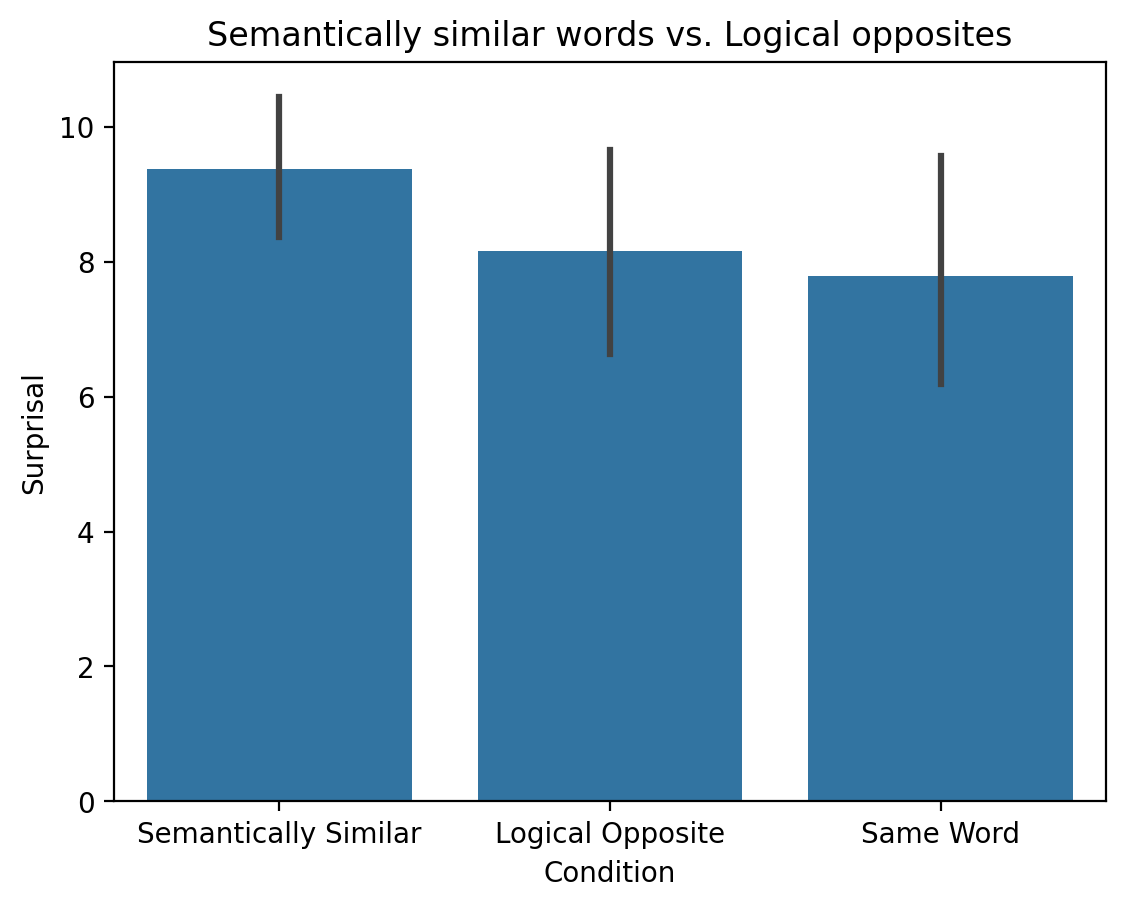

In [ ]:
### Semantically similar words vs. Logical opposites barplot
sns.barplot(data = df_results1, x = "Condition", y = "Surprisal").set(title="Semantically similar words vs. Logical opposites")

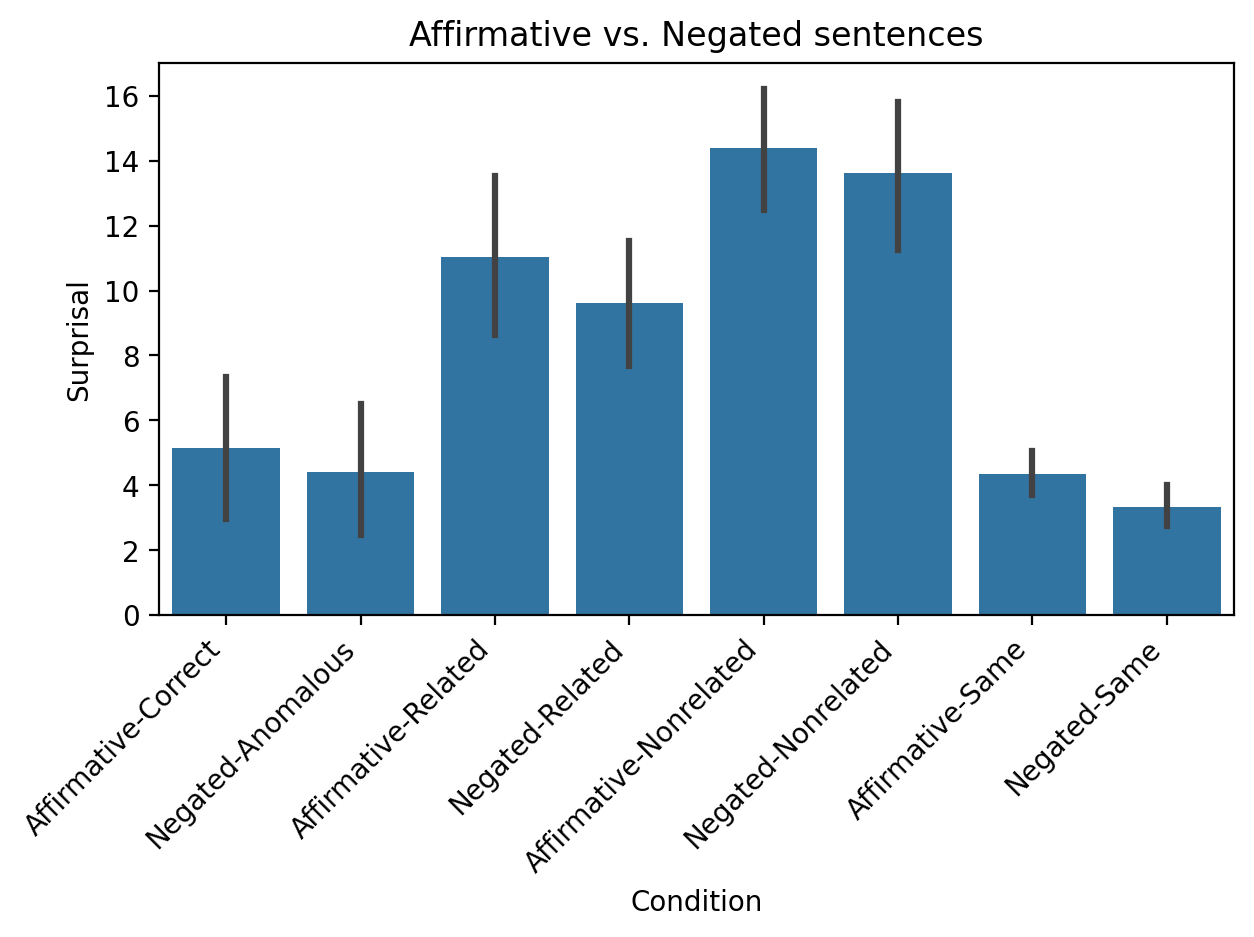

In [ ]:
### Affirmative vs. Negated sentences barplot
sns.barplot(data = df_results2, x = "Condition", y = "Surprisal").set(title="Affirmative vs. Negated sentences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Results


The surprisal for `semantically similar` completions was slightly larger than `logical opposite` completions. We predicted that this would occur if GPT-2 was sensitive to negation, but the `same word` completions had the smallest surprisal out of all the conditions, differing from their predicted surprisal (a larger surprisal than `logical opposite` completions).

This was also true for the `affirmative` vs. `negated` sentence frames, where `same` word completions had the smallest surprisal out of all the conditions. For all of the `affirmative` vs. `negated` sentence frame conditions, the words in the `affirmative` conditions had higher surprisal than the words in the `negated` conditions, despite different semantic relations to the target word. The `non-related` words had the largest surprisal values which was not surprising, but it is hard to tell whether the high surprisal is a result of negation sensitivity or since they were the most likely words to not be associated with the subject in the sentence frame in the training data, or in real life. The `affirmative-correct` and `negated-anomalous` completions produced the second smallest surprisals out of the minimal pairs addressing the sentence frames, which meets expectations as producing a low surprisal for correctly phrased negation is the "expected" behavior for an LLM that is sensitive to negation.

# Discussion

The results indicate that GPT-2 exhibits some limited sensitivity to semantic relationships under negation; however, it does not consistently demonstrate sensitivity to the logical meaning of negation itself. Specifically, surprisal was slightly higher for semantically similar completions compared to logical opposite completions, aligning with our prediction if the model was sensitive to negation. However, contrary to predictions, the surprisal for completions with the same word as the subject is lower than both of these conditions. This suggests that the differences may be due to token familiarity and frequency rather than logical reasoning for negation. This can also be inferred from the results of using affirmative and negated sentence frames, where broader yet semantically related words produced higher surprisal within affirmative conditions rather than negated conditions. Overall, these findings suggest that GPT-2 does not seem to be fully sensitive to negation in the way that humans are.


These results reflect the capabilities of large language models to capture different dimensions of meaning with distributional semantics, specifically their ability to understand logic-based semantics. LLMs such as GPT-2 may struggle with generalization when using logic-based rules; they tend to ignore how terms with logical rules can alter sentence meaning and focus more on predicting words that are commonly found within the same context. This suggests that even pretrained LLMs may lack a systemic understanding of logic-based rules, instead relying on surface-level statistical associations learned during training.

The mismatch between GPT-2's performance on negation tasks and human expectations calls into question what information is necessary for logic-based semantic understanding. Although negation is a frequent construction in language, it is hard to capture the information needed to structure the logic of the term when an understanding of what a subject "is not" requires a vast understanding of what an object "is". Humans perform similarly to LLMs when asked to "not" think of something and tend to think about the subject they were asked not to think about. This doesn't imply that humans do not understand negation, but rather that thinking about a logical opposite in an open-ended manner is a hard task to accomplish due to the infinite amount of words that could qualify as logical opposites. Despite this, humans are more capable of reflective responses to negation and being able to reason through their answers. This may be reflected in more modern LLMs, where negation sensitivity may be higher due to their training shifting away from shallow processing and more towards chain-of-thought reasoning.

## **Ignore this text box:** The downloaded PDF cuts off the paragraph above this text box if this is not included.
## **Ignore this text box:** The downloaded PDF cuts off the paragraph above this text box if this is not included.
## **Ignore this text box:** The downloaded PDF cuts off the paragraph above this text box if this is not included.
## **Ignore this text box:** The downloaded PDF cuts off the paragraph above this text box if this is not included.
## **Ignore this text box:** The downloaded PDF cuts off the paragraph above this text box if this is not included.